In [13]:
import sys
%load_ext autoreload
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%autoreload 2
from FEMOL import RectangleQuadMesh, FEM_Problem, TOPOPT_Problem
from FEMOL_utils import *

# Developping Notebook

### Mesh

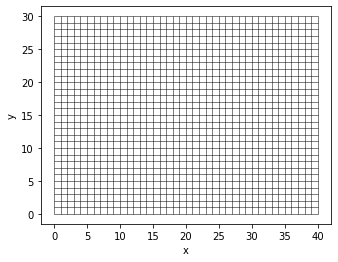

In [15]:
nelx = 40 # elements in the x direction
nely = 30 # elements in the y direction

# Creating the mesh
Lx = nelx
Ly = nely

mesh = RectangleQuadMesh(Lx, Ly, nelx, nely)
mesh.plot()

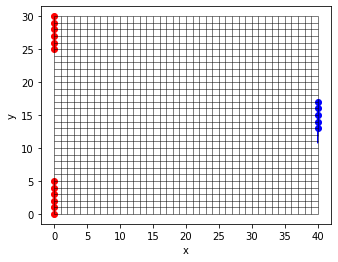

In [46]:
# distributing the material to the initial volume fraction
volfrac=0.4
penal=3
X = np.ones(nelx*nely)*volfrac  


# Material proprieties
base_material = general_flax()
coating_material = general_carbon()

# Composite material layup
base_layup = [0, 0, 0, 0]
coating_layup = [90]

# Creating the FEM Problem
Problem = FEM_Problem(mesh) # initialize the problem
# Element stiffness matrix for coating and base
Problem.base_material_Ke(base_material, base_layup)
Problem.coating_material_Ke(coating_material, coating_layup)

# Boundary condition domains :

# Fixed nodes on the left side
x = [0]
y1, y2 = [[0, Ly/6]], [[5*Ly/6, Ly]]

fixed_domain1 = create_domain(x, y1)
fixed_domain2 = create_domain(x, y2)
Problem.add_fixed_domain(fixed_domain1)
Problem.add_fixed_domain(fixed_domain2)

# Domain where the down force is applied
x = [Lx]
y = [[5*Ly/12, 7*Ly/12]]
force_domain = create_domain(x, y)

# Defining the force
force = [[0, -100000]] #  Force = [Fx, Fy]

Problem.add_forces(force, [force_domain])

Problem.assemble_coated_material_topopt(X, penal)
Problem.fix_boundary()
Problem.plot()

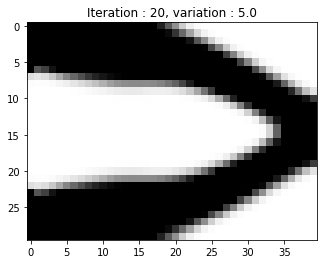

In [47]:
TOPT_BiMaterial = TOPOPT_Problem(Problem)
Coating_0_90 = TOPT_BiMaterial.solve_coating(converge=0.05)

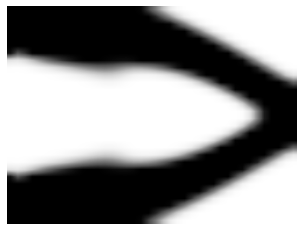

In [44]:
Coating_0_90.plot()

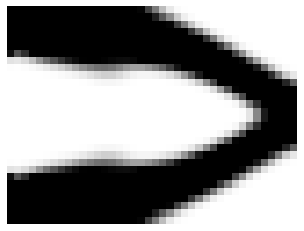

In [45]:
Coating_0_90.animate('coating_isotropic')